In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
test_data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
print(df.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [6]:
df= df.drop_duplicates()
test_data= test_data.drop_duplicates()

In [7]:
print(df.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
#fill up or replace the null

df["Item_Weight"].replace(np.nan, df["Item_Weight"].mean(), inplace = True)
df["Outlet_Size"].replace(np.nan, df["Outlet_Size"].mode()[0], inplace = True)

test_data["Item_Weight"].replace(np.nan, test_data["Item_Weight"].mean(), inplace = True)
test_data["Outlet_Size"].replace(np.nan, test_data["Outlet_Size"].mode()[0], inplace = True)

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [13]:
# there are no null values, so we are good to proceed now!

In [14]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

<AxesSubplot:title={'center':'Item_Visibility'}, ylabel='Density'>

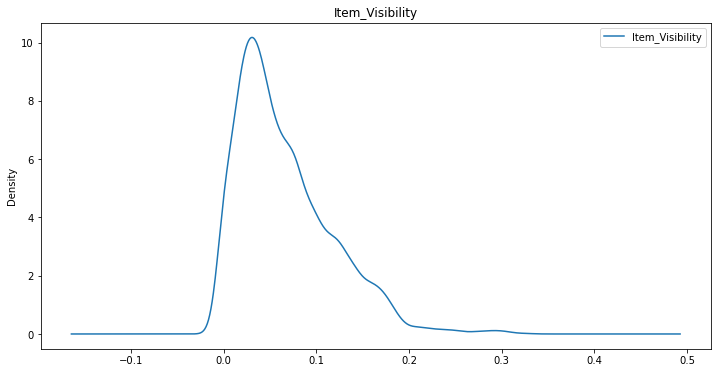

In [18]:
df[['Item_Visibility']].plot(kind='kde', title='Item_Visibility', figsize=(12,6))

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, ylabel='Density'>

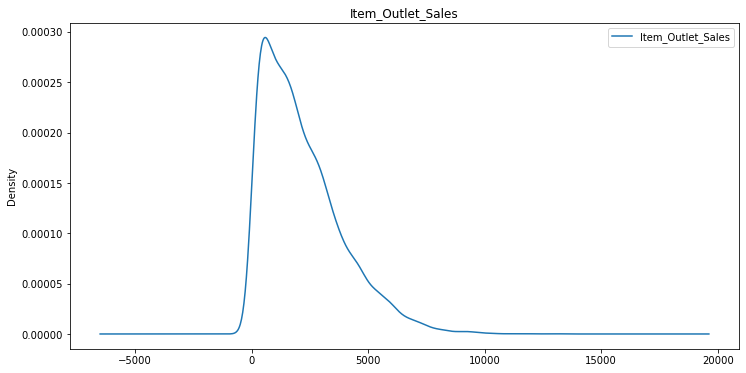

In [19]:
df[['Item_Outlet_Sales']].plot(kind='kde', title='Item_Outlet_Sales', figsize=(12,6))

In [20]:
# Both of the above features are positively skewed, we need to handle them to find out the outliers

In [21]:
# Mutual correlations

In [22]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [23]:
# Boxplot for outliers

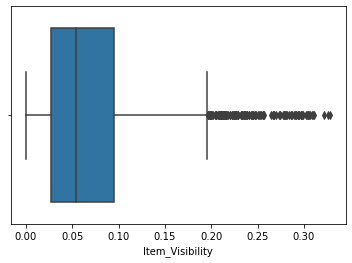

In [24]:
sns.boxplot(df['Item_Visibility'])
plt.show()

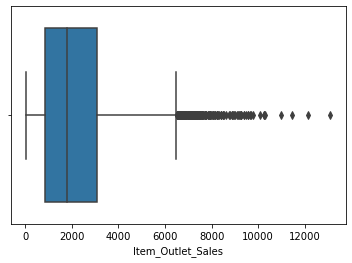

In [25]:
sns.boxplot(df['Item_Outlet_Sales'])
plt.show()

In [26]:
# EDA

In [27]:
columns=['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']

In [28]:
columns

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [29]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [30]:
#Encoding the categorical feature sex

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [32]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

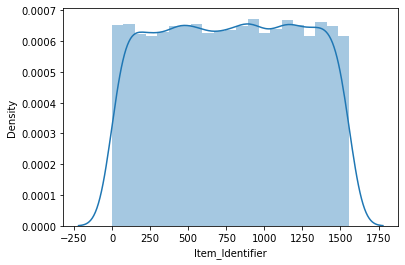

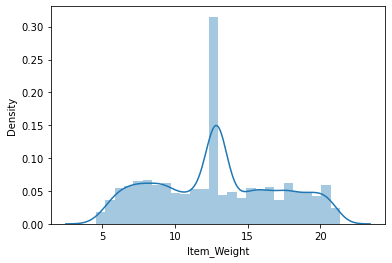

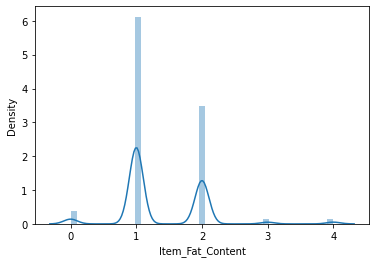

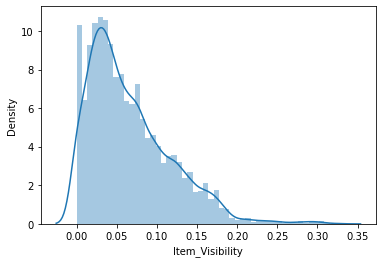

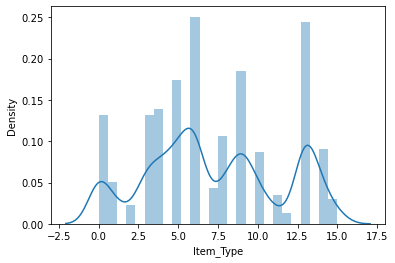

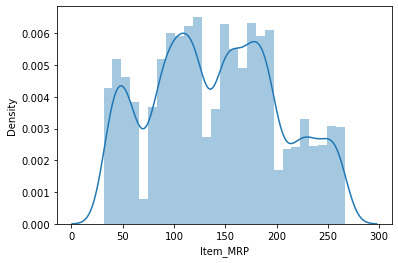

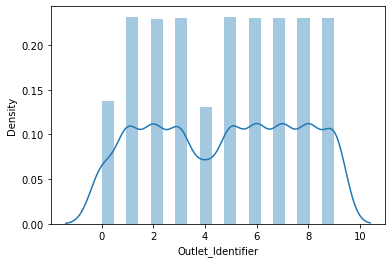

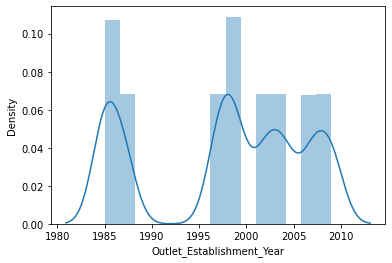

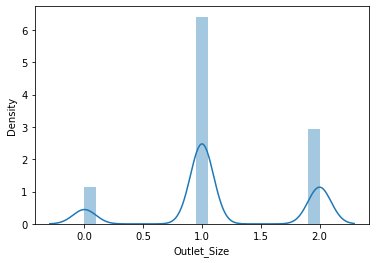

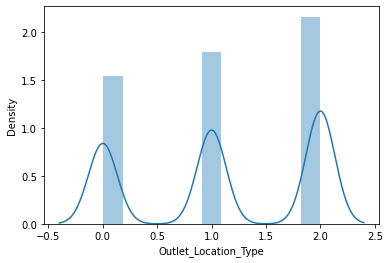

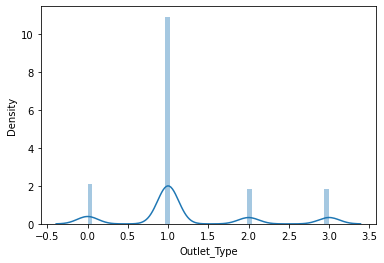

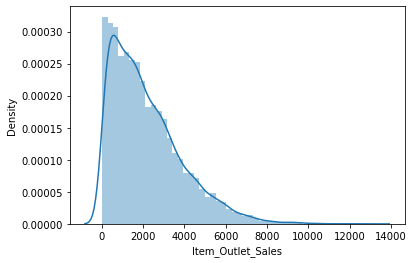

In [33]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

In [34]:
# let us remove these outliers

In [35]:
df.shape

(8523, 12)

In [36]:
# z-score method for outlier removal
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [37]:
df= df[(z<3).all(axis=1)]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [38]:
df.shape

(8222, 12)

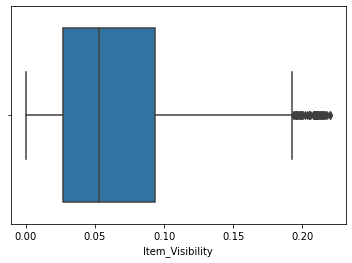

In [39]:
sns.boxplot(df['Item_Visibility'])
plt.show()

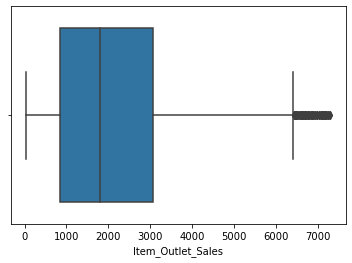

In [40]:
sns.boxplot(df['Item_Outlet_Sales'])
plt.show()

In [41]:
df['Item_Visibility'].skew()

0.7945061319331548

In [42]:
df['Item_Outlet_Sales'].skew()

0.8774759405342293

In [43]:
# Still some outliers are there in the feature Item_Visibility
# let us apply cube root method to reduce the skewness

In [44]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

In [45]:
df.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility             -0.244803
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

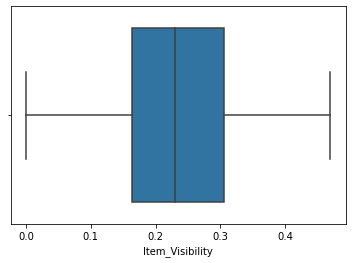

In [46]:
sns.boxplot(df['Item_Visibility'])
plt.show()

In [47]:
# now the outliers has gone!

<AxesSubplot:>

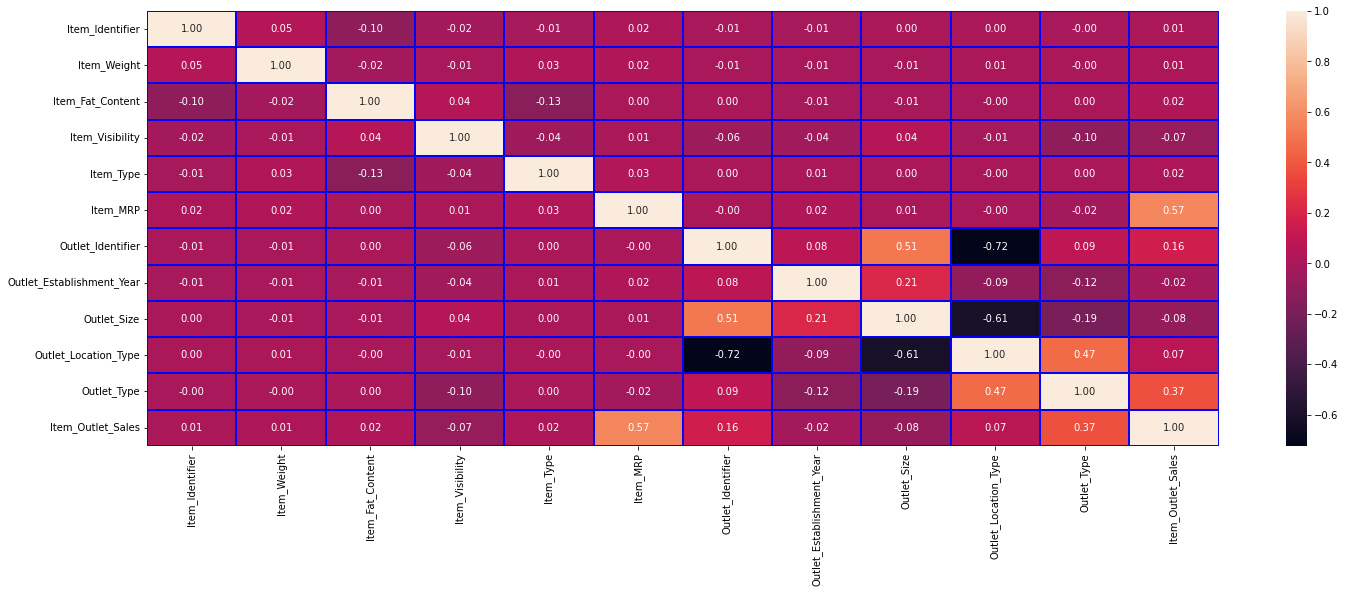

In [48]:
#Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot= True, linewidths= 0.1, linecolor= 'blue', fmt= '0.2f')

In [49]:
# From the Heat map we can see that almost all columns are positively correleated

In [50]:
# VIF to check multicolinearity

In [51]:
vif= df.drop('Item_Outlet_Sales',axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scl= sc.fit_transform(vif)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
VIF= pd.DataFrame()
VIF['features']= vif.columns
VIF['VIF']= [variance_inflation_factor(df_scl,i ) for i in range(len(vif.columns))]
VIF

,features,VIF
0,Item_Identifier,1.014386
1,Item_Weight,1.003935
2,Item_Fat_Content,1.028727
3,Item_Visibility,1.021467
4,Item_Type,1.019864
5,Item_MRP,1.002859
6,Outlet_Identifier,4.135299
7,Outlet_Establishment_Year,1.075919
8,Outlet_Size,1.704043
9,Outlet_Location_Type,5.847788


In [54]:
# Outlet_Location_Type is highly correlated with Item_Outlet_Sales, so there is multicollinearity
# We should drop it, but we will not as there is the feature present in the test data!

In [55]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.126678,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.138846,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.129461,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.238293,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.216754,0.0,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.187580,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.381078,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [56]:
# Train- Test split and scaling

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
X= df.drop('Item_Outlet_Sales',axis=1)
y= df['Item_Outlet_Sales']

In [59]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156.0,9.300,1.0,0.126678,4.0,249.8092,9.0,1999,1.0,0.0,1.0
1,8.0,5.920,2.0,0.138846,14.0,48.2692,3.0,2009,1.0,2.0,2.0
2,662.0,17.500,1.0,0.129461,10.0,141.6180,9.0,1999,1.0,0.0,1.0
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.238293,13.0,214.5218,1.0,1987,0.0,2.0,1.0
8519,897.0,8.380,2.0,0.216754,0.0,108.1570,7.0,2002,1.0,1.0,1.0
8520,1357.0,10.600,1.0,0.187580,8.0,85.1224,6.0,2004,2.0,1.0,1.0
8521,681.0,7.210,2.0,0.381078,13.0,103.1332,3.0,2009,1.0,2.0,2.0


In [60]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [61]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.26058572],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.26058572]])

In [62]:
# Machine learning Modelling

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [64]:
lr= LinearRegression()
rf= RandomForestRegressor()
svr= SVR()
knn= KNeighborsRegressor(n_neighbors =4)
rd= Ridge()
ls= Lasso()

In [65]:
# LinearRegression

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lrscore= cross_val_score(lr, X, y, cv=5)
lrc= lrscore.mean()
print('Cross Val Score:', lrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :1254542.019947
Mean Squared error of testing set :1254910.551222
R2 Score of training set:0.50
R2 Score of testing set:0.49
Cross Val Score: 49.617573062838574
difference of cross-validation and R2 score is:0.54


In [67]:
#RandomForestRegressor

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :154534.728101
Mean Squared error of testing set :1251971.962141
R2 Score of training set:0.94
R2 Score of testing set:0.52
Cross Val Score: 53.70525317995434
difference of cross-validation and R2 score is:1.67


In [69]:
#SVR

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

svrscore= cross_val_score(svr, X, y, cv=5)
svrc= svrscore.mean()
print('Cross Val Score:', svrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(svrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :2385458.332897
Mean Squared error of testing set :2369630.037071
R2 Score of training set:0.05
R2 Score of testing set:0.04
Cross Val Score: 5.106049627047464
difference of cross-validation and R2 score is:1.06


In [71]:
# KNeighborsRegressor

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

knnscore= cross_val_score(knn, X, y, cv=5)
knnc= knnscore.mean()
print('Cross Val Score:', knnc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(knnc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :792640.591822
Mean Squared error of testing set :1311678.817256
R2 Score of training set:0.68
R2 Score of testing set:0.48
Cross Val Score: 46.13398625922361
difference of cross-validation and R2 score is:1.98


In [73]:
# Ridge

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rd.fit(X_train, y_train)
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rdscore= cross_val_score(rd, X, y, cv=5)
rdc= rdscore.mean()
print('Cross Val Score:', rdc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rdc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :1242036.837285
Mean Squared error of testing set :1304228.368996
R2 Score of training set:0.50
R2 Score of testing set:0.49
Cross Val Score: 49.61768327582995
difference of cross-validation and R2 score is:0.76


In [75]:
# Lasso

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

ls.fit(X_train, y_train)
y_train_pred = ls.predict(X_train)
y_test_pred = ls.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lsscore= cross_val_score(ls, X, y, cv=5)
lsc= lsscore.mean()
print('Cross Val Score:', lsc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lsc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :1244957.820321
Mean Squared error of testing set :1293151.840886
R2 Score of training set:0.50
R2 Score of testing set:0.49
Cross Val Score: 49.620746629466176
difference of cross-validation and R2 score is:0.60


In [77]:
# We can see from above ridge has highest efficiency!

In [78]:
# Ridge

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rd.fit(X_train, y_train)
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rdscore= cross_val_score(rd, X, y, cv=5)
rdc= rdscore.mean()
print('Cross Val Score:', rdc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rdc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :1258224.570659
Mean Squared error of testing set :1239378.159382
R2 Score of training set:0.50
R2 Score of testing set:0.50
Cross Val Score: 49.61768327582995
difference of cross-validation and R2 score is:0.25


In [140]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

params={'alpha': [1,0.1,0.01,0.001,0.0001,0] , 
        "fit_intercept": [True, False], 
        "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

rd2= Ridge()

rdgrid=GridSearchCV(rd2,param_grid=params,cv=4)
rdgrid.fit(X_train,y_train)  
      
print(rdgrid.best_params_)

{'alpha': 0, 'fit_intercept': True, 'solver': 'sag'}


In [147]:
rd2= Ridge(alpha=0, fit_intercept= True, solver= 'sag')
rd2.fit(X_train, y_train)
rd2.score(X_train, y_train)
pred_decision= rd2.predict(X_test)

rd2s= r2_score(y_test, pred_decision)
print('R2 score:', rd2s*100)

rd2score= cross_val_score(rd2, X, y, cv=5)
rd2c= rd2score.mean()
print('Cross Val Score:', rd2c*100)
print('difference of cross-validation and R2 score is:%.2f'%abs(rd2c*100- r2_score(y_test, y_test_pred)*100))

R2 score: 49.865773974151715
Cross Val Score: 49.6194768064875
difference of cross-validation and R2 score is:0.25


In [137]:
# Efficiency hs not been changed!

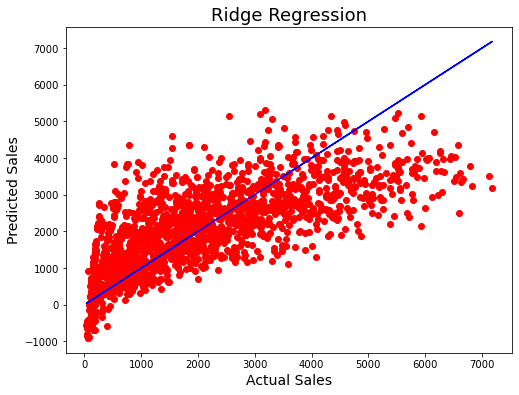

In [142]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

In [143]:
import pickle
filename= 'churn.pkl'
pickle.dump(rd2, open(filename, 'wb'))

In [144]:
[]

[]

In [146]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

49.866234421139055


In [148]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [149]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644
Predicted,2543.783451,282.522347,2423.656067,1090.291828,2466.999980,1136.959304,2462.544931,2672.674881,3350.251030,2168.736339,...,1500.274138,2060.888894,1972.640284,1666.061503,1242.023297,1355.291759,4847.732986,2626.158653,4616.079748,2479.499856
Original,2543.546588,281.453943,2423.248727,1090.560650,2467.430668,1137.664199,2462.659544,2672.229486,3350.532584,2168.254063,...,1499.864816,2060.866030,1971.701330,1665.824012,1241.936604,1355.811014,4847.731691,2626.006766,4616.103458,2479.340440


In [89]:
# We will now run our model on the test data

In [150]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1


In [151]:
# Change the object data to numerical and standardize the data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Object_test=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type',
             'Outlet_Type']

In [152]:
for i in Object_test:
    test_data[i]=le.fit_transform(test_data[i])

In [153]:
# scaling test dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_X= scaler.fit_transform(test_data)
test_X

array([[ 0.73989552,  1.89745979, -0.57528374, ..., -0.28473712,
        -1.369215  , -0.25276858],
       [ 0.65908503, -1.03552991,  4.10469757, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 1.42005049,  0.44863355, -0.57528374, ..., -0.28473712,
         1.0915602 , -1.50799439],
       ...,
       [ 1.43351891, -0.63504136, -0.57528374, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-0.57551969,  0.6135406 ,  0.98471003, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.47950616, -0.75283211,  0.98471003, ..., -0.28473712,
        -0.1388274 , -0.25276858]])

In [154]:
X_=pd.DataFrame(test_X,columns=test_data.columns)

In [155]:
X_

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.739896,1.897460e+00,-0.575284,-1.134077,1.366916,-0.536555,1.507689,0.139891,-0.284737,-1.369215,-0.252769
1,0.659085,-1.035530e+00,4.104698,-0.531850,-0.766450,-0.868937,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
2,1.420050,4.486336e-01,-0.575284,0.661316,0.892835,1.629848,-1.664731,0.020438,-0.284737,1.091560,-1.507994
3,0.079943,-1.267578e+00,-0.575284,-0.981416,1.366916,0.226697,-0.959749,1.095512,-0.284737,-0.138827,-0.252769
4,0.921719,-5.230960e-14,0.984710,1.032540,-0.766450,1.508110,0.097725,-1.532446,-0.284737,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.217514,-5.172506e-01,0.984710,-1.018333,1.366916,0.004727,1.155198,-0.099015,1.381166,-1.369215,-0.252769
5677,-1.049159,-1.200437e+00,0.984710,1.508493,1.840998,0.455014,-0.607258,1.334417,-0.284737,1.091560,1.002457
5678,1.433519,-6.350414e-01,-0.575284,0.153074,0.181713,-0.360485,0.802707,0.498248,-0.284737,-0.138827,-0.252769
5679,-0.575520,6.135406e-01,0.984710,-1.281690,-1.003490,1.190844,-0.959749,1.095512,-0.284737,-0.138827,-0.252769


In [159]:
test_pred=loaded_model.predict(X_)

In [160]:
test=pd.DataFrame(data=test_pred)
test

,0
0,2112.224698
1,1278.138433
2,2183.156802
3,2132.200729
4,4772.938712
...,...
5676,2214.818557
5677,2931.163921
5678,1872.607818
5679,3078.565550


In [161]:
Final_dataset=test_data.join(test)
Final_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,0
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,2112.224698
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1,1278.138433
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0,2183.156802
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1,2132.200729
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,4772.938712
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1,2214.818557
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2,2931.163921
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1,1872.607818
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1,3078.565550


In [162]:
# Rename the column name as 'Item_Outlet_Sales'

In [163]:
Final_dataset.rename(columns={0: 'Item_Outlet_Sales'}, inplace=True)

In [164]:
Final_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,2112.224698
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1,1278.138433
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0,2183.156802
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1,2132.200729
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,4772.938712
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1,2214.818557
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2,2931.163921
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1,1872.607818
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1,3078.565550
